### Importação dos dados



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# **Análise Exploratória dos Dados - Recomendação de Loja para Venda**

##**Introdução**

Este relatório tem como objetivo subsidiar a decisão do Sr. João sobre qual loja de sua rede deve ser vendida para iniciar um novo empreendimento. A análise foi realizada com base em dados de vendas, desempenho e avaliações de 4 lojas, utilizando Python, pandas e matplotlib para gerar gráficos e realizar as comparações entre as lojas.

Foram considerados os seguintes dados para geração dos indicadores:

***Faturamento total por loja***

***Vendas por categorias***

***Média das avaliações das lojas***

***Produtos mais e menos vendidos***

***Frete médio por loja***


A seguir apresento o desenvolvimento da análise passo a passo conforme os dados descritos acima e na sequência a recomendação final.

In [6]:
# Verificar valores nulos
loja.info()
loja2.info()
loja3.info()
loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns 

In [7]:
# Remover valores nulos (aplicado a todas as lojas por precaução e consistência)
loja.dropna(inplace=True)
loja2.dropna(inplace=True)
loja3.dropna(inplace=True)
loja4.dropna(inplace=True)

#1. Análise do faturamento

In [8]:
def calcular_faturamento(loja, nome_loja):
  """
  Função para calcular e exibir o faturamento total de cada loja.

  Parâmetros:
  lojas (list): Lista de tuplas com os DataFrames das lojas e seus respectivos nomes.
  nome_loja: nome da loja a exibir
  """
  faturamento_total = loja['Preço'].sum()
  print(f'A {nome_loja} faturou um total de: {faturamento_total}')
  return faturamento_total



fat_total_loja1 = calcular_faturamento(loja, 'Loja 1')
fat_total_loja2 = calcular_faturamento(loja2, 'Loja 2')
fat_total_loja3 = calcular_faturamento(loja3, 'Loja 3')
fat_total_loja4 = calcular_faturamento(loja4, 'Loja 4')


A Loja 1 faturou um total de: 1534509.12
A Loja 2 faturou um total de: 1488459.06
A Loja 3 faturou um total de: 1464025.03
A Loja 4 faturou um total de: 1384497.58


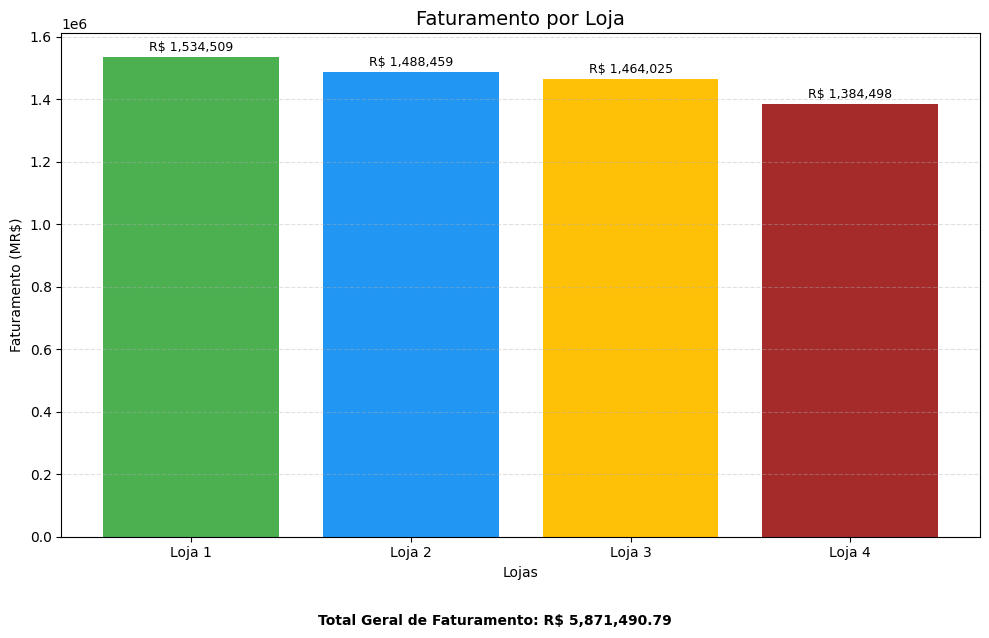

In [9]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
cores = ['#4CAF50', '#2196F3', '#FFC107', '#A52A2A']
total_geral = sum(faturamento)


plt.figure(figsize=(10,6))
plt.bar(lojas, faturamento, color=cores)


plt.title("Faturamento por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (MR$)")
plt.grid(axis='y', linestyle='--', alpha=0.4)


for i, valor in enumerate(faturamento):
    plt.text(i, valor + 10000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=9)


plt.figtext(0.5, -0.05, f"Total Geral de Faturamento: R$ {total_geral:,.2f}",
            ha="center", fontsize=10, weight='bold', color='black')


plt.tight_layout()
plt.savefig("faturamento_lojas.png", dpi=300, bbox_inches='tight')
plt.show()



# 2. Vendas por Categoria


In [10]:
def produtos_categoria(loja, nome_loja):
  """
  Função que agrupa e mostra as categorias mais populares (com base nas vendas) por loja.

  Parâmetros:
  loja (DataFrame): Dados da loja.
  nome_loja (str): Nome da loja para exibição.
  """
  vendas_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')
  vendas_categoria = vendas_categoria.sort_values(by='Quantidade de Vendas', ascending=False)
  print(f'As categorias mais populares da loja {nome_loja} são:')
  print(vendas_categoria)
  return vendas_categoria

vendas_cat_loja1 = produtos_categoria(loja, 'Loja 1')
vendas_cat_loja2 = produtos_categoria(loja2, 'Loja 2')
vendas_cat_loja3 = produtos_categoria(loja3, 'Loja 3')
vendas_cat_loja4 = produtos_categoria(loja4, 'Loja 4')

As categorias mais populares da loja Loja 1 são:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   465
2            eletronicos                   448
0             brinquedos                   324
1       eletrodomesticos                   312
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
7  utilidades domesticas                   171
As categorias mais populares da loja Loja 2 são:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181
As categorias mais populares da loja Loja 3 são:
    Cat

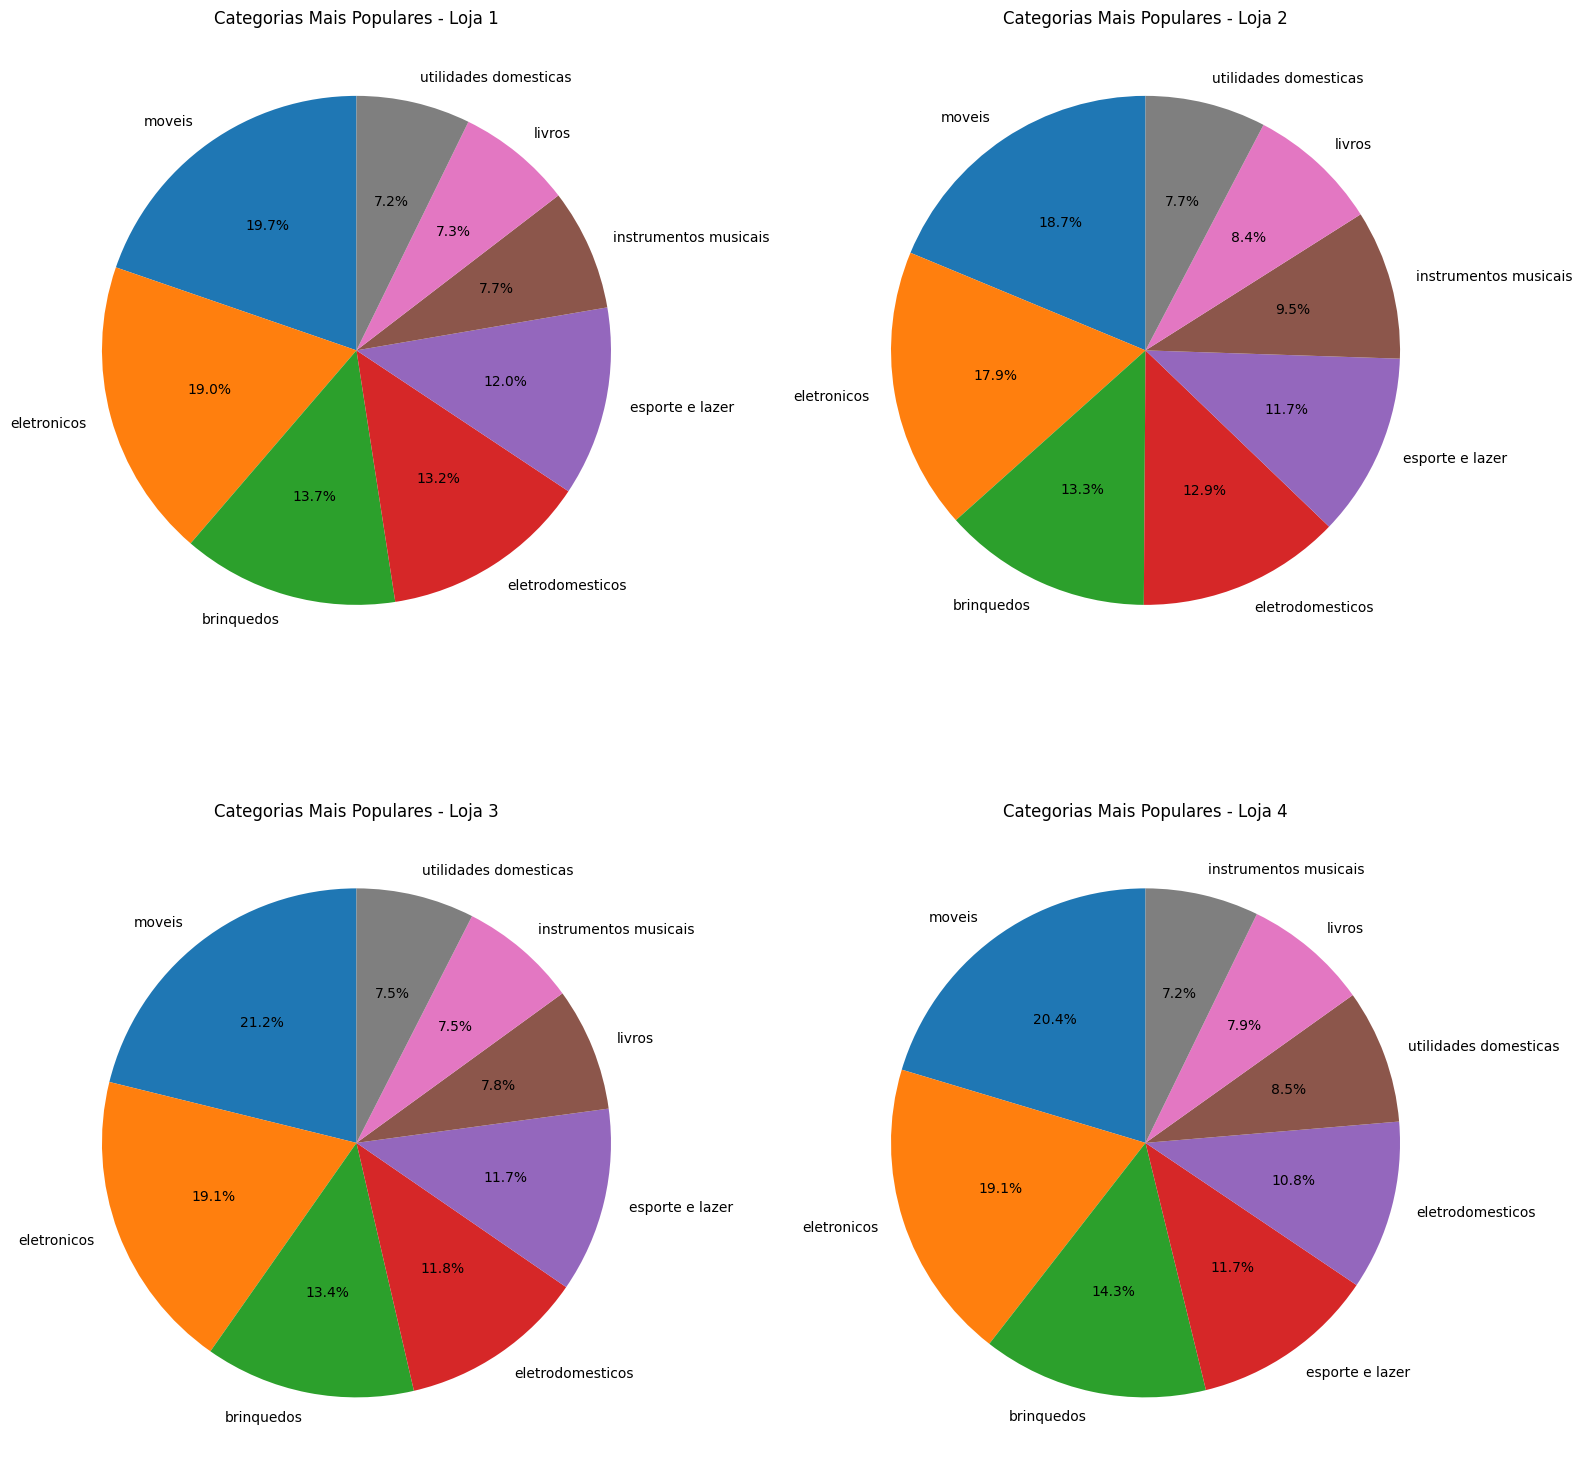

In [11]:
import matplotlib.pyplot as plt

# Lista de DataFrames e nomes das lojas
lojas_data = [
    (loja, 'Loja 1'),
    (loja2, 'Loja 2'),
    (loja3, 'Loja 3'),
    (loja4, 'Loja 4')
]

# Criando a figura e os eixos (subplots)
fig, axes = plt.subplots(2, 2, figsize=(16, 16))  # 2 linhas, 2 colunas

# Loop para criar um gráfico para cada loja
for i, (loja_df, nome_loja) in enumerate(lojas_data):
    # Obtém os dados de vendas por categoria para a loja atual
    vendas_categoria = loja_df.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')
    vendas_categoria = vendas_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

    # Define a posição do gráfico na grade
    linha = i // 2  # Calcula a linha (0 ou 1)
    coluna = i % 2  # Calcula a coluna (0 ou 1)

    # Cria o gráfico de pizza no subplot correspondente
    axes[linha, coluna].pie(vendas_categoria['Quantidade de Vendas'],
                            labels=vendas_categoria['Categoria do Produto'],
                            autopct='%1.1f%%',
                            startangle=90)
    axes[linha, coluna].set_title(f'Categorias Mais Populares - {nome_loja}')

# Ajusta o layout e exibe a figura
plt.tight_layout()
plt.savefig("vendas_categoria.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Média de Avaliação das Lojas

In [12]:
def avaliacao_media(loja, nome_loja):
  """
  Função para calcular e exibir a média de avaliação por cada loja.

  Parâmetros:
  loja (DataFrame): O DataFrame contendo os dados da loja.
  nome_loja (str): Nome da loja para exibição.

  Built-Function:
  .mean(): calcular a média

  """
  media_loja = loja['Avaliação da compra'].mean()
  print(f'Média da {nome_loja}: {media_loja: .2f}')

avaliacao_media(loja, 'Loja 1')
avaliacao_media(loja2, 'Loja 2')
avaliacao_media(loja3, 'Loja 3')
avaliacao_media(loja4, 'Loja 4')

Média da Loja 1:  3.98
Média da Loja 2:  4.04
Média da Loja 3:  4.05
Média da Loja 4:  4.00


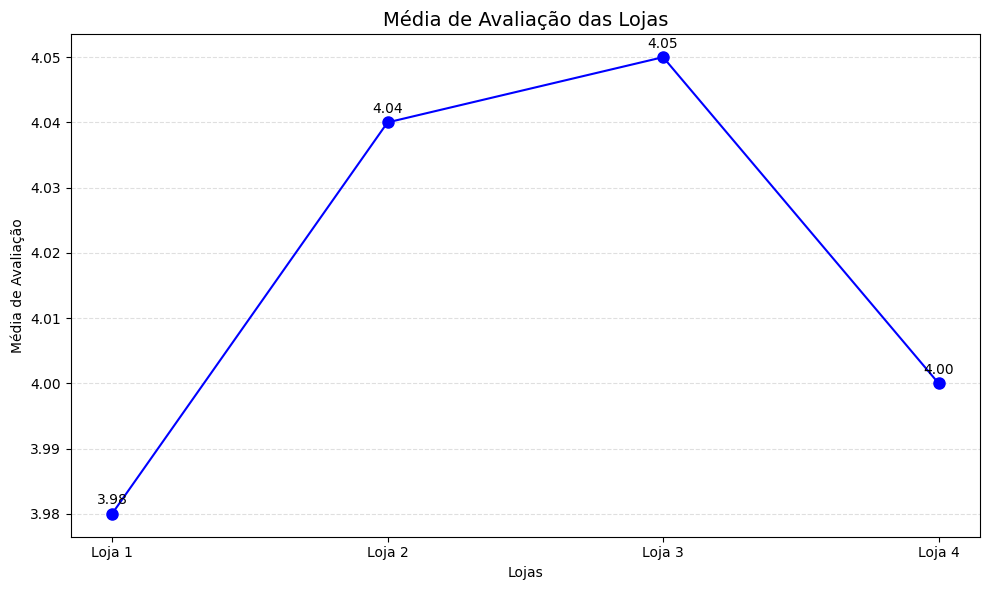

In [13]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
media_loja = [3.98, 4.04, 4.05, 4.00]


plt.figure(figsize=(10,6))
plt.plot(lojas, media_loja, marker = 'o', linestyle = '-', color='blue', markersize = 8)


plt.title("Média de Avaliação das Lojas", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.grid(axis='y', linestyle='--', alpha=0.4)


for i, valor in enumerate(media_loja):
    plt.text(lojas[i], valor +0.001, f'{valor:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.savefig("media_avaliacao_lojas.png", dpi=300, bbox_inches='tight')
plt.show()


In [14]:
import os
print(os.getcwd())

/content


# 4. Produtos Mais e Menos Vendidos

In [15]:
def produtos_vendidos(loja, nome_loja):
  """
  Função para verificar os produtos mais e menos vendidos em cada loja .

  Parâmetros:
  loja (DataFrame): O DataFrame contendo os dados da loja.
  nome_loja (str): Nome da loja para exibição.

  """

  # Agrupa os produtos por nome e conta as ocorrências (vendas)
  vendas_por_produto = loja.groupby('Produto')['Produto'].count()

  # Encontra o produto mais vendido (índice com maior valor) e quantidade
  produto_mais_vendido = vendas_por_produto.idxmax()
  qtd_mais_vendido = vendas_por_produto.max()

  # Encontra o produto menos vendido (índice com menor valor) e quantidade
  produto_menos_vendido = vendas_por_produto.idxmin()
  qtd_menos_vendido = vendas_por_produto.min()

  print(f"\n{nome_loja}:")
  print(f"Produto mais vendido: {produto_mais_vendido} ({qtd_mais_vendido} unidades)")
  print(f"Produto menos vendido: {produto_menos_vendido} ({qtd_menos_vendido} unidades)")

  return produto_mais_vendido, produto_menos_vendido, qtd_mais_vendido, qtd_menos_vendido

mais_vendido, menos_vendido, qtd_mais_vendido, qtd_menos_vendido = produtos_vendidos(loja, "Loja 1")
mais_vendido2, menos_vendido2, qtd_mais_vendido2, qtd_menos_vendido2 = produtos_vendidos(loja2, "Loja 2")
mais_vendido3, menos_vendido3, qtd_mais_vendido3, qtd_menos_vendido3 = produtos_vendidos(loja3, "Loja 3")
mais_vendido4, menos_vendido4, qtd_mais_vendido4, qtd_menos_vendido4 = produtos_vendidos(loja4, "Loja 4")






Loja 1:
Produto mais vendido: Guarda roupas (60 unidades)
Produto menos vendido: Celular ABXY (33 unidades)

Loja 2:
Produto mais vendido: Iniciando em programação (65 unidades)
Produto menos vendido: Jogo de tabuleiro (32 unidades)

Loja 3:
Produto mais vendido: Kit banquetas (57 unidades)
Produto menos vendido: Blocos de montar (35 unidades)

Loja 4:
Produto mais vendido: Cama box (62 unidades)
Produto menos vendido: Guitarra (33 unidades)


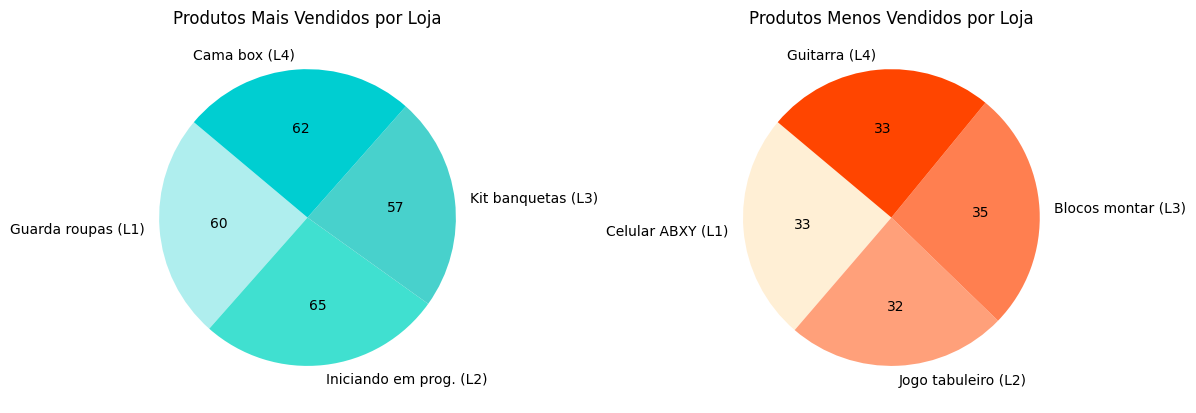

In [16]:

import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Guarda roupas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Celular ABXY (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_mais = ['#AFEEEE', '#40E0D0', '#48D1CC', '#00CED1']
cores_menos = ['#FFEFD5', '#FFA07A', '#FF7F50', '#FF4500']

# Função para mostrar apenas os valores absolutos
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

plt.figure(figsize=(12, 6))

# Gráfico - Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_mais)
plt.title('Produtos Mais Vendidos por Loja')

# Gráfico - Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_menos)
plt.title('Produtos Menos Vendidos por Loja')

plt.tight_layout()
plt.savefig("produtos_mais_menos_vendidos.png", dpi=300, bbox_inches='tight')
plt.show()


# 5. Frete Médio por Loja


In [17]:
def media_frete(loja, nome_loja):
    """
    Função para calcular e exibir a média de frete de uma loja.

    Parâmetros:
    loja (DataFrame): O DataFrame contendo os dados da loja.
    nome_loja (str): Nome da loja para exibição.
    """
    frete = loja['Frete'].mean()
    print(f'Média de Frete para {nome_loja}: {round(frete, 2)}')

lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

for loja, nome in lojas:
    media_frete(loja, nome)

Média de Frete para Loja 1: 34.69
Média de Frete para Loja 2: 33.62
Média de Frete para Loja 3: 33.07
Média de Frete para Loja 4: 31.28


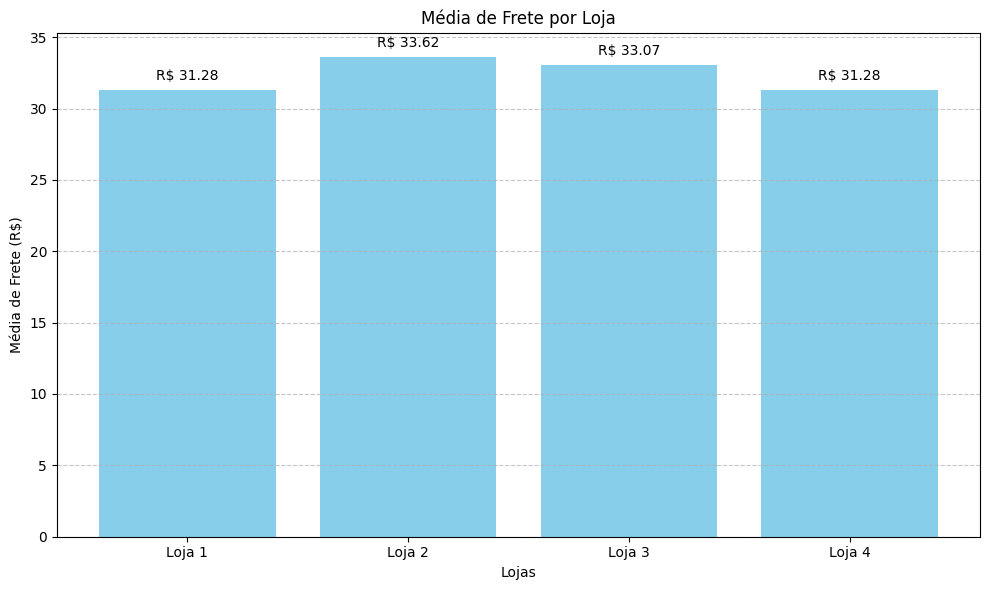

In [18]:
import matplotlib.pyplot as plt

# Lista de DataFrames e nomes das lojas
lojas_data = [
    (loja, 'Loja 1'),
    (loja2, 'Loja 2'),
    (loja3, 'Loja 3'),
    (loja4, 'Loja 4')
]

# Calcula a média de frete para cada loja e armazena em uma lista
medias_frete = [loja_df['Frete'].mean() for loja_df, _ in lojas_data]
nomes_lojas = [nome_loja for _, nome_loja in lojas_data]

# Cria o gráfico de colunas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(nomes_lojas, medias_frete, color='skyblue')  # Cria as barras

# Configurações do gráfico
plt.title('Média de Frete por Loja')  # Título
plt.xlabel('Lojas')  # Rótulo do eixo x
plt.ylabel('Média de Frete (R$)')  # Rótulo do eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona grade ao eixo y

# Adiciona os valores da média acima de cada barra
for i, valor in enumerate(medias_frete):
    plt.text(i, valor + 0.5, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=10)

# Exibe o gráfico
plt.tight_layout()
plt.savefig("media_frete_lojas.png", dpi=300, bbox_inches='tight')
plt.show()

# 6. Relatório Final

#**Recomendação Final**

##**Conclusão**

Com base nos dados apresentados ao longo dessa análise tivemos:

***Faturamento total por loja:*** A loja 1 teve o melhor faturamento e a loja 4 o pior

***Vendas por categorias:*** Todas as lojas obtiveram vendas em todas as categorias, com um percentual muito próximo em todas as categorias

***Média das avaliações das lojas:*** A loja 1 teve a pior média de avaliação, enquanto a loja 3 foi melhor avaliada. Porém a avaliação da loja 4 ficou bem próxima da avaliação da loja 1, podendo ser considerada uma avaliação ruim.

***Produtos mais e menos vendidos:*** Nesse quesito, podemos avaliar o tipo de produto mais vendido e o menos vendido, mas não acrescenta muito peso na decisão de qual loja deve ser vendida

***Frete médio por loja:*** O frete médio da loja 1 é o maior, enquanto do frete médio da loja quatro é o menor, porém a diferença nesse valor médio de 3,41 não é o suficiente para compensar a diferença de faturamento total que foi de 150.011,00.


##**Recomendação:**

Com base na análise dos dados acima, recomendo a venda da Loja 4, pois apesar de apresentar o frete médio mais baixo, o que poderia ser positivo, não compensou o baixo volume de vendas e também não superou as outras lojas em nenhum dos critérios principais de desempenho.
Essa estratégia permite ao Sr. João investir seu capital nas lojas com maior potencial de crescimento e melhor reputação.

##7. Análise de Desempenho Geográfico

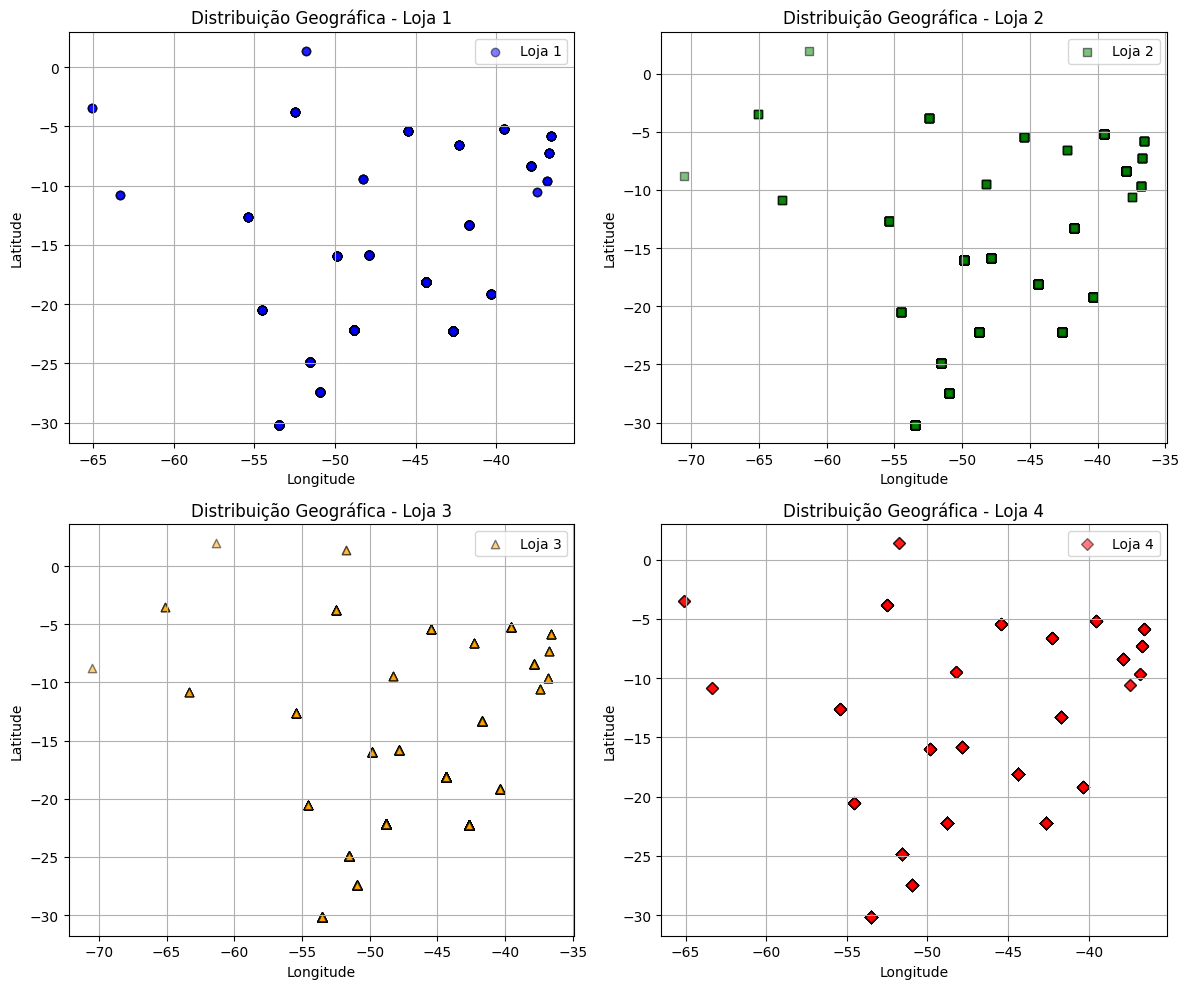

In [19]:
import matplotlib.pyplot as plt

# Lista de DataFrames, nomes das lojas e cores
lojas_data = [
    (loja, 'Loja 1', 'blue'),
    (loja2, 'Loja 2', 'green'),
    (loja3, 'Loja 3', 'orange'),
    (loja4, 'Loja 4', 'red')
]

# Criando a figura e os eixos (subplots)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 linhas, 2 colunas

# Marcadores diferentes para cada loja (definido antes do loop)
marcadores = ['o', 's', '^', 'D']

# Loop para criar um gráfico para cada loja
for i, (loja_df, nome_loja, cor) in enumerate(lojas_data):
    # Calcula a posição do gráfico na grade
    linha = i // 2  # Calcula a linha (0 ou 1)
    coluna = i % 2  # Calcula a coluna (0 ou 1)

    # Plota os dados no subplot correspondente
    axes[linha, coluna].scatter(loja_df['lon'], loja_df['lat'], alpha=0.5,
                                c=cor, edgecolors='k', label=nome_loja,
                                marker=marcadores[i])

    # Configurações do subplot
    axes[linha, coluna].set_title(f'Distribuição Geográfica - {nome_loja}')
    axes[linha, coluna].set_xlabel('Longitude')
    axes[linha, coluna].set_ylabel('Latitude')
    axes[linha, coluna].grid(True)
    axes[linha, coluna].legend()

# Ajusta o layout e exibe a figura
plt.tight_layout()
plt.savefig("distribuicao_geografica_lojas.png", dpi=300, bbox_inches='tight')
plt.show()
